In [1]:
%matplotlib inline

import os
import sys
import shap
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from copy import deepcopy
from datetime import datetime, timedelta
from typing import Dict, List, Tuple, Any, Union, Optional

from xgboost import XGBClassifier

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score


shap.initjs()

In [2]:
import cancer_package.constants as constants
import cancer_package.pipeline_tuner as pipeline_tuner
import cancer_package.utilities as utilities

In [4]:
tt = joblib.load("results/xgb_multi_energy_20210326_0845/model.pkl")

<AxesSubplot:>

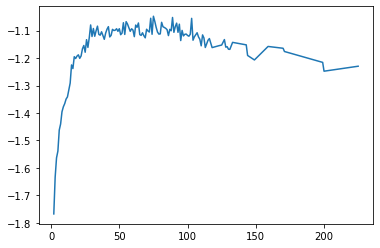

In [10]:
tt["fs_scores"].plot.line()

In [6]:
# 'xgb_20210324_0004', 'model_1121.pkl'
previous_tuning = joblib.load(os.path.join(constants.RESULTS_DIRECTORY, 'xgb_20210323_0956', 'model.pkl'))
fs_pipes = previous_tuning["fs_pipes"]
fs_scores = previous_tuning["fs_scores"]
fs_features = previous_tuning["fs_features"]

xgb_best_pipe = fs_pipes[fs_scores.idxmax()]
best_features = fs_features[fs_scores.idxmax()]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fs_scores.plot.line()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/cancer_research/results/xgb_20210323_0956/model.pkl'

In [7]:
def create_xgb_pipe():
    """
    Creates a XGBoost model depending on the classification problem type.
    The categories were aggregates such that there are only 2 then it will 
    treat it as a binary problem, if there are more then 2 then it will a
    multiple classification problem.
    
    :raise ValueError: if there is < 2 classes 
    :return: an XGBoost model within a pipeline
    """
    if len(category_encoder.classes_) == 2:
        xgb_model = XGBClassifier(
          objective="binary:logistic",
          n_jobs=-1,  
          #eval_metric="auc", #['mlogloss', 'merror'],
          random_state=666
        )
    elif len(category_encoder.classes_) > 2:
        xgb_model = XGBClassifier(
          objective='multi:sofprob', # 'multi:softmax',
          n_jobs=-1,  
          num_class=len(category_encoder.classes_),
          #eval_metric="mlogloss",
          random_state=666
        )
    else:
        raise ValueError("it isn't possible to have less than 2 classes")

    xgb_pipe = Pipeline(steps=[("model", xgb_model)])

    return xgb_pipe

<AxesSubplot:xlabel='0', ylabel='1'>

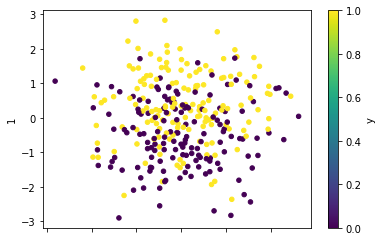

In [97]:
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=300, n_informative=2, n_redundant=4)#, random_state=1)
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)
y_train.name="y"

pd.concat([X_train, y_train], 1).plot.scatter(x=0, y=1, c="y", colormap='viridis')   

<AxesSubplot:xlabel='7', ylabel='15'>

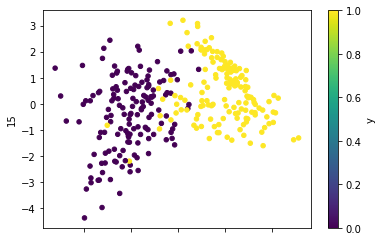

In [101]:
pd.concat([X_train, y_train], 1).plot.scatter(x=7, y=15, c="y", colormap='viridis')   

<AxesSubplot:xlabel='x1', ylabel='x2'>

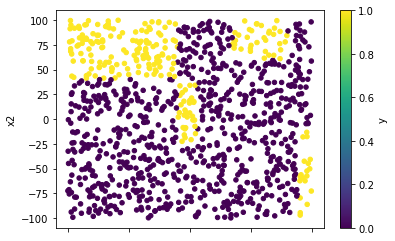

In [82]:
def create_y(x1, x2):
    if x1 < -10 and 40 < x2:
        return 1
    elif -10 <= x1 < 5 and -30 < x2 < 40:
        return 1
    elif 35 < x1 < 80 and 60 < x2:
        return 1
    elif 90 < x1 and x2 < -10:
        return 1
    else:
        return 0

X_train = pd.DataFrame(
    np.random.uniform(-100, 100, [1000, 20]),
    columns=[f"x{i}" for i in range(20)]
)
y_train = X_train.apply(lambda row: create_y(row["x1"], row["x2"]), 1)
y_train.name = "y"

pd.concat([X_train, y_train], 1).plot.scatter(x="x1", y="x2", c="y", colormap='viridis')   

In [13]:
from unittest.mock import Mock, MagicMock
category_encoder = Mock()
category_encoder.classes_ = [0,1]
len(category_encoder.classes_)

2

In [102]:
import importlib
importlib.reload(pipeline_tuner)

<module 'cancer_package.pipeline_tuner' from '/home/jupyter/cancer_research/cancer_package/pipeline_tuner.py'>


step 0 starts
|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.5125   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  2        | -0.3585   |  0.4737   |  0.3588   |  0.5418   |  0.1334   |  7.271    |  29.26    |  0.3875   |
|  3        | -0.2324   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.126    |  20.96    |  5.579    |
|  4        | -0.1926   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.014    |  23.82    |  4.879    |
|  5        | -0.3595   |  0.3      |  1.0      |  0.3      |  0.3      |  2.0      |  30.0     |  10.0     |
len(selected_cols) 20
X_train.shape (300, 20)
best_score_iter -0.1925810379193475
score with 20 features: -19.26%
best score so far, model:
 {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', '

,features,imp
7,7,0.358934
1,1,0.160741
15,15,0.159735
5,5,0.056550
4,4,0.034767
3,3,0.022538
10,10,0.022120
14,14,0.020481
11,11,0.018582
2,2,0.017178


-- rm features
-- rm 0.05 features


array([18])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2036   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.4722   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  3        | -0.3551   |  0.4737   |  0.3588   |  0.5418   |  0.1334   |  7.271    |  29.26    |  0.3875   |
|  4        | -0.2373   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.126    |  20.96    |  5.579    |
|  5        | -0.2412   |  0.3      |  1.0      |  0.3      |  0.3      |  2.0      |  30.0     |  10.0     |
|  6        | -0.3577   |  1.0      |  0.3      |  1.0      |  0.1      |  8.0      |  15.0     |  10.0     |
len(selected_cols) 19
X_train.shape (300, 19)
best_score_iter -0.20364461729923886
score with 19 features: -20.36%
step 

,features,imp
7,7,0.382354
1,1,0.180785
15,15,0.095338
3,3,0.072902
5,5,0.045233
2,2,0.022370
17,17,0.020705
4,4,0.020308
16,16,0.018860
14,14,0.018595


-- rm features
-- rm 0.05263157894736842 features


array([0])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.197    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.197    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.5244   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  4        | -0.3262   |  0.4737   |  0.3588   |  0.5418   |  0.1334   |  7.271    |  29.26    |  0.3875   |
|  5        | -0.2026   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.126    |  20.96    |  5.579    |
|  6        | -0.197    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.014    |  23.82    |  4.879    |
|  7        | -0.555    |  1.0      |  0.3      |  0.3      |  0.1      |  2.0      |  30.0     |  10.0     |
len(select

,features,imp
6,7,0.638859
4,5,0.079360
14,15,0.049348
2,3,0.043237
11,12,0.025002
0,1,0.019107
16,17,0.016593
17,19,0.014812
3,4,0.014500
15,16,0.013801


-- rm features
-- rm 0.05555555555555555 features


array([9])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1952   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.1952   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.1952   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.5679   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  5        | -0.3505   |  0.4737   |  0.3588   |  0.5418   |  0.1334   |  7.271    |  29.26    |  0.3875   |
|  6        | -0.2013   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.126    |  20.96    |  5.579    |
|  7        | -0.1952   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.014    |  23.82    |  4.879    |
|  8      

,features,imp
6,7,0.622306
4,5,0.073085
13,15,0.054286
0,1,0.049674
10,12,0.047479
12,14,0.017640
7,8,0.015582
8,10,0.015376
14,16,0.014252
11,13,0.014197


-- rm features
-- rm 0.058823529411764705 features


array([19])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1903   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.1903   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.1903   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.1903   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.5392   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  6        | -0.3648   |  0.4737   |  0.3588   |  0.5418   |  0.1334   |  7.271    |  29.26    |  0.3875   |
|  7        | -0.2324   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.126    |  20.96    |  5.579    |
|  8      

,features,imp
6,7,0.498928
4,5,0.134964
10,12,0.128207
13,15,0.061934
3,4,0.030748
0,1,0.022252
12,14,0.017490
15,17,0.014447
14,16,0.014259
7,8,0.014036


-- rm features
-- rm 0.0625 features


array([2])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2253   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2253   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2253   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2253   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2253   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.4744   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  7        | -0.394    |  0.4737   |  0.3588   |  0.5418   |  0.1334   |  7.271    |  29.26    |  0.3875   |
|  8      

,features,imp
5,7,0.253013
3,5,0.163400
12,15,0.149113
9,12,0.099609
1,3,0.098587
0,1,0.049801
4,6,0.033111
13,16,0.032650
7,10,0.023210
2,4,0.023143


-- rm features
-- rm 0.06666666666666667 features


array([8])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.213    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.213    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.213    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.213    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.213    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.213    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.4181   |  0.3073   |  0.6513   |  0.647    |  0.1268   |  2.853    |  18.28    |  4.185    |
|  8      

,features,imp
5,7,0.328655
11,15,0.261546
0,1,0.196576
3,5,0.120319
10,14,0.022408
13,17,0.019356
2,4,0.018429
1,3,0.013741
6,10,0.013721
4,6,0.002760


-- rm features
-- rm 0.21428571428571427 features


array([11, 12, 13])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2063   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2063   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2063   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2063   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2063   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.2063   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2268   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
5,7,0.575104
8,15,0.071981
3,5,0.056058
1,3,0.050600
7,14,0.048513
6,10,0.046963
10,17,0.040698
4,6,0.037481
9,16,0.036730
2,4,0.035872


-- rm features
-- rm 0.09090909090909091 features


array([1])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2034   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2034   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2034   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2034   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2034   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.2034   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2314   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
4,7,0.428384
2,5,0.164148
7,15,0.147288
0,3,0.065421
1,4,0.049511
9,17,0.035661
5,10,0.033813
3,6,0.029531
6,14,0.025855
8,16,0.020388


-- rm features
-- rm 0.1 features


array([16])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2325   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2325   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2325   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2325   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2325   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.2325   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2132   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
4,7,0.616340
7,15,0.072267
5,10,0.053710
2,5,0.053277
6,14,0.049914
3,6,0.039640
8,17,0.039478
0,3,0.038051
1,4,0.037323


-- rm features
-- rm 0.1111111111111111 features


array([4])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.221    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.221    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.221    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.221    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.221    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.221    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2586   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
3,7,0.815352
6,15,0.051847
4,10,0.030583
0,3,0.025622
7,17,0.024664
1,5,0.019304
5,14,0.018656
2,6,0.013972


-- rm features
-- rm 0.125 features


array([6])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2179   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2179   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2179   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2179   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2179   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.2179   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2657   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
2,7,0.820542
5,15,0.051618
3,10,0.031150
6,17,0.028581
1,5,0.028402
0,3,0.022856
4,14,0.016851


-- rm features
-- rm 0.14285714285714285 features


array([14])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.206    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.206    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.206    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.206    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.206    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.206    |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2032   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
2,7,0.853663
4,15,0.050417
3,10,0.028270
5,17,0.025276
1,5,0.023508
0,3,0.018865


-- rm features
-- rm 0.16666666666666666 features


array([3])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2168   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2168   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2168   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2168   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2168   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.2168   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.23     |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
1,7,0.868718
3,15,0.053650
4,17,0.029959
2,10,0.028996
0,5,0.018677


-- rm features
-- rm 0.2 features


array([5])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.2076   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.2076   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.2076   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.2076   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.2076   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.2076   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2869   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
0,7,0.905421
2,15,0.037588
3,17,0.028818
1,10,0.028173


-- rm features
-- rm 0.25 features


array([10])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1894   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.1894   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.1894   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.1894   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.1894   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.1894   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2269   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
0,7,0.839956
1,15,0.124462
2,17,0.035582


-- rm features
-- rm 0.3333333333333333 features


array([17])

|   iter    |  target   | model_... | model_... | model_... | model_... | model_... | model_... | model_... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.1786   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  2        | -0.1786   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  3        | -0.1786   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  4        | -0.1786   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  5        | -0.1786   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  6        | -0.1786   |  0.7102   |  0.8107   |  0.6467   |  0.2563   |  6.0      |  24.0     |  4.879    |
|  7        | -0.2139   |  0.8826   |  0.5132   |  0.9207   |  0.177    |  2.0      |  21.0     |  5.579    |
|  8      

,features,imp
0,7,0.874929
1,15,0.125071


-- rm features
-- rm 0.5 features


array([15])

couldn't remove more features
total time 0:00:28


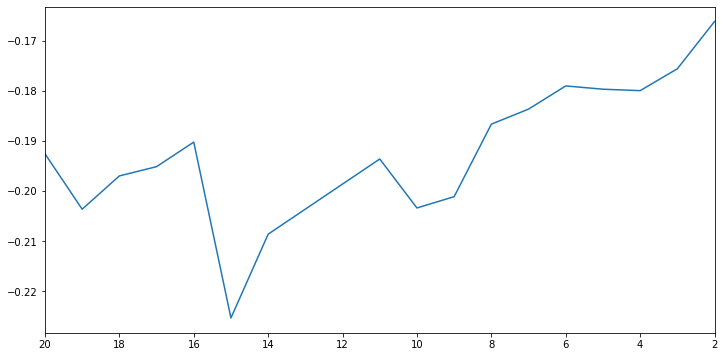

In [103]:
cv_splitter = StratifiedKFold(5, random_state=69, shuffle=True)
w_array = utilities.class_weights(y_train)

xgb_pipe_bounds = {
    'model__max_depth': [2, 8],
    'model__n_estimators': [15, 30],
    'model__learning_rate': [.1, .3],
    'model__reg_lambda': [0, 10],
    'model__colsample_bytree': [.3, 1],
    'model__colsample_bylevel': [.3, 1],
    'model__colsample_bynode': [.3, 1],
}



pipe_tuner = pipeline_tuner.PipelineTuner(
    create_xgb_pipe,
    xgb_pipe_bounds,
    X_train,
    y_train,
    # "roc_auc_ovr_weighted" #"balanced_accuracy" "f1_micro"
    scorer="neg_log_loss", #"neg_log_loss" if len(category_encoder.classes_) > 2 else "roc_auc", 
    cv=cv_splitter,
    weight_array=w_array,
    #patience=2,
)

pipe_tuner.bayes_config(
    n_iter = 3,
    init_points = 2,
    discrete_vars = [f"model__{elem}" for elem in  ["max_depth", "n_estimators"]]
)

#pipe_tuner.save( constants.RESULTS_DIRECTORY, results_base)

#pipe_tuner.continue_tuning(
#    os.path.join(constants.RESULTS_DIRECTORY, 'xgb_20210322_0913', 'model.pkl')
#)

pipe_tuner.tune()
pipe_tuner.plot_tuning()

xgb_best_pipe = pipe_tuner.best_pipe
best_features = pipe_tuner.best_features
fs_pipes = pipe_tuner.fs_pipes
fs_scores = pipe_tuner.fs_scores
fs_features = pipe_tuner.fs_features

In [88]:
fs_features#.iloc[-1]

20    [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, ...
15    [x1, x2, x3, x4, x5, x6, x9, x10, x11, x12, x1...
14    [x1, x2, x3, x4, x5, x6, x10, x11, x12, x14, x...
13    [x1, x2, x3, x4, x5, x6, x10, x11, x12, x14, x...
12    [x1, x2, x4, x5, x6, x10, x11, x12, x14, x15, ...
11    [x1, x2, x4, x6, x10, x11, x12, x14, x15, x16,...
10       [x1, x2, x4, x6, x10, x11, x12, x14, x16, x18]
7                       [x1, x2, x4, x6, x12, x14, x16]
6                           [x1, x2, x6, x12, x14, x16]
5                                [x1, x2, x6, x12, x16]
4                                     [x1, x2, x6, x12]
3                                          [x1, x2, x6]
2                                              [x1, x2]
dtype: object

In [89]:
fs_features[fs_scores.idxmax()]

array(['x1', 'x2', 'x6', 'x12'], dtype=object)

In [44]:
pd.Series(create_xgb_pipe().fit(X_train, y_train)["model"].feature_importances_).sort_values()

3     0.005944
6     0.006253
15    0.006495
7     0.007115
12    0.007621
5     0.008114
8     0.008261
18    0.008831
4     0.008969
19    0.009253
10    0.009609
16    0.010043
9     0.016424
2     0.027248
0     0.027927
11    0.035158
17    0.045259
14    0.053043
13    0.087836
1     0.610595
dtype: float32

In [38]:
for my_features, my_pipe in zip(fs_features, fs_pipes):
    print(f"n features {len(my_features)}")
    display(
        pd.concat(
            [ 
                pd.Series(my_features, name="feat"),
                pd.Series(my_pipe["model"].feature_importances_, name="imp")
            ],
            1
        ).sort_values("imp") 
    )
    print("\n\n")

n features 20


,feat,imp
19,19,0.000000
16,16,0.000000
15,15,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
18,18,0.000000
10,10,0.000000





n features 19


,feat,imp
15,15,0.002689
10,10,0.003583
8,8,0.003614
3,3,0.004160
18,18,0.005104
5,5,0.005166
6,6,0.005231
12,12,0.005771
16,16,0.005945
4,4,0.006095





n features 18


,feat,imp
15,16,0.000000
12,12,0.000000
3,3,0.000000
5,5,0.000000
7,7,0.000000
10,10,0.000000
8,8,0.005202
6,6,0.006799
4,4,0.007845
17,18,0.012186





n features 17


,feat,imp
8,8,0.004784
16,18,0.004877
5,5,0.005494
12,12,0.005564
3,3,0.005606
10,10,0.005608
7,7,0.006094
6,6,0.006526
4,4,0.007083
9,9,0.016134





n features 16


,feat,imp
6,6,0.004670
7,7,0.005213
3,3,0.005250
5,5,0.005264
9,10,0.005472
11,12,0.006113
15,18,0.006318
4,4,0.007992
8,9,0.013858
0,0,0.023076





n features 15


,feat,imp
6,7,0.005026
5,5,0.005051
8,10,0.005224
14,18,0.005332
3,3,0.005708
10,12,0.006362
4,4,0.007700
7,9,0.014966
2,2,0.021266
0,0,0.023201





n features 14


,feat,imp
3,3,0.005497
5,5,0.005802
7,10,0.006131
13,18,0.006167
9,12,0.006525
4,4,0.008252
6,9,0.013914
0,0,0.023943
2,2,0.024452
12,17,0.040281





n features 13


,feat,imp
4,5,0.004990
8,12,0.005396
6,10,0.005580
12,18,0.006668
3,4,0.007603
5,9,0.015947
2,2,0.022319
0,0,0.024575
7,11,0.039394
11,17,0.041119





n features 12


,feat,imp
5,10,0.005263
7,12,0.006177
11,18,0.006489
3,4,0.006926
4,9,0.014447
2,2,0.014628
0,0,0.019108
10,17,0.036040
6,11,0.038140
9,14,0.068217





n features 11


,feat,imp
6,12,0.009164
3,4,0.010421
10,18,0.010505
0,0,0.030053
4,9,0.031579
2,2,0.033677
8,14,0.079313
7,13,0.088450
5,11,0.101856
9,17,0.142807





n features 10


,feat,imp
9,18,0.012462
3,4,0.012905
4,9,0.020790
0,0,0.035966
2,2,0.043680
8,17,0.070813
6,13,0.094128
5,11,0.094960
7,14,0.107413
1,1,0.506882





n features 9


,feat,imp
3,4,0.006639
2,2,0.011386
4,9,0.013928
0,0,0.018124
5,11,0.031863
8,17,0.034919
7,14,0.045962
6,13,0.074236
1,1,0.762943





n features 8


,feat,imp
0,0,0.036685
7,17,0.052366
6,14,0.069394
4,11,0.071777
3,9,0.097526
5,13,0.126868
2,2,0.192127
1,1,0.353258





n features 7


,feat,imp
6,17,0.080052
5,14,0.083567
3,11,0.130747
2,9,0.133778
0,1,0.142327
4,13,0.181635
1,2,0.247894





n features 6


,feat,imp
2,9,0.031643
1,2,0.053912
3,11,0.056997
5,14,0.087962
4,13,0.111425
0,1,0.658060





n features 5


,feat,imp
0,1,0.101822
2,11,0.145877
3,13,0.157846
4,14,0.279963
1,2,0.314491





n features 4


,feat,imp
1,11,0.096921
0,2,0.147066
2,13,0.163529
3,14,0.592484





n features 3


,feat,imp
0,2,0.280644
1,13,0.337538
2,14,0.381817





n features 2


,feat,imp
0,13,0.335393
1,14,0.664607





n features 1


,feat,imp
0,14,1.0


In [105]:
from typeguard import typechecked
from typing import Dict, List
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_predict

@typechecked
def categories_shap(
        explainer: shap.Explainer,
        X: pd.DataFrame,
        category_names: List[str],
        feature_names: Dict[str, str]
    ) -> None:
    shap_values = explainer.shap_values(observations)

    for category, shap_category in zip(category_names, shap_values):
        print(category.center(60))
        shap.summary_plot(
            shap_category,
            observations.rename(columns=feature_names),
            title=category,
            alpha=.5
        )


def patient_score(
        model_pipe,
        X,
        y,
        cv,
        category_names
    ):
    pred_probas = cross_val_predict(model_pipe, X, y, cv=cv, n_jobs=-1, method="predict_proba")
    stats = pd.DataFrame(pred_probas, columns=category_names, index=X.index)
    stats["pred"] = stats.idxmax(axis="columns")
    stats["target"] = np.array(category_names)[y]
    stats["good_pred"] = stats["pred"] == stats["target"]
    stats["log_loss"] = [log_loss(real, pred) for real, pred in
        zip(pd.get_dummies(y).values, stats[category_names].values)]
    stats["pred_code"] = pred_probas.argmax(1)
    stats["target_code"] = y
    stats.sort_values("log_loss", inplace=True)
    return stats


def patient_shap(
    explainer,
    pred_probas,
    data_pipe,
    X,
    column_names,
    n_best=1,
    n_worst=1):
  """
  Creates SHAP force plots for each patient.
  """
  def _shap_plot(val):
    return shap.force_plot( 
      explainer.expected_value[row[val]],
      shap_values[row[val]].values.loc[[patient_idx]].values,
      features=X_trans.rename(columns=column_names).loc[[patient_idx]],
      #text_rotation=45
    )

  shap.initjs()
  X_trans = data_pipe.fit_transform(X)
  shap_values = explainer.shap_values(X_trans)
  shap_values = [pd.DataFrame(sv, index=X_trans.index) for sv in shap_values]

  for _, df in predict_probas.groupby("target"):
    print("=" * 30 + f"  {df['target'].iloc[0]}  " + "=" * 30 + "\n")
    mask = [False] * (len(df) - n_best - n_worst)
    mask = [True] * n_best + mask + [True] * n_worst
    display(df[mask])
    for patient_idx, row in df[mask].iterrows():
      if row["good_pred"]:
        correct_wrong = "correctly"
      else:
        correct_wrong = "wrongly"
      print("-" * 50)
      print(f'Patient {patient_idx + 1} with log-loss: {row["log_loss"]:.3}')
      print(f'the true condition {row["target"]} was {correct_wrong} predicted ' +
            f'with probability: {row[row["target"]]:.2}')   
      display(_shap_plot("target_code"))

      if not row["good_pred"]:
        print(f'the wrong condition {row["pred"]} was predicted with ' +
            f'probability: {row[row["pred"]]:.2}')
        display(_shap_plot("pred_code"))

In [108]:
xgb_best_pipe["model"]

Pipeline(memory=None,
         steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.9732527009179066,
                               colsample_bynode=0.42384886122973986,
                               colsample_bytree=0.49169322231116297, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.26684643322683654,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=30,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='binary:logistic', random_state=666,
                               reg_alpha=0, reg_lambda=6.066481597001639,
                               scale_pos_weight=1, subsample=1,


In [107]:
tree_explainer = shap.TreeExplainer(xgb_best_pipe["model"])
categories_shap(tree_explainer,
                X_train,
                ["Cancer", "NonCancer"],
                {7: "A", 15: "B"})

TypeError: type of keys of argument "feature_names" must be str; got int instead